# 12 Conjecture and Simulation-9th Attempt

In [2]:
!pip install --upgrade quantecon

import scipy.sparse as sp
import numpy as np
import scipy.stats as sps
from scipy.stats import randint
from scipy.special import beta, binom
import quantecon as qe
import matplotlib.pyplot as plt
import scipy.special
from math import gamma
from numba import njit
%matplotlib inline

Requirement already up-to-date: quantecon in /Users/shuhu/anaconda3/lib/python3.7/site-packages (0.4.5)
You should consider upgrading via the 'pip install --upgrade pip' command.


# 1 Conjecture

## 1.1 Preparation

### Assumption 1 

**Incumbent Firm size distribution** evolves as a **Markov Chain** on the firm size state space $\varPhi= \{ \varphi^s\}_{s=1,\cdots, S}$ with transition matrix
$$
P=\begin{pmatrix}a+b & c & 0 & \cdots & \cdots & 0 & 0 \\a & b & c & \cdots & \cdots & 0 & 0 \\\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\0 & 0 & 0 & \cdots & a & b & c \\0 & 0 & 0 & \cdots & 0 & a & b+c\end{pmatrix} \tag{1}
$$

- where
  - $0<a<1$;
  - $0<b<1$;
  - $0<c<1$;
  - $a+b+c=1$.

### Corollary 1 (law of motion at steady state

Define $\hat \mu_t= \frac{\mu_t}{M}$ for any $t$.

With a **continuum of firms**, or equivalently, when **aggregate uncertainty is absent**, $\epsilon_{t+1}=0$:
$$
\hat \mu_{t+1} = (\tilde{P}_t)' (\hat \mu_t + G) \tag{2}
$$

- where
  - $\tilde P_t$: the transition matrix $P$,
    - where the first $\tilde s( \mu_t)-1$ rows are replaced by 0s;
      - where $\tilde s( \mu_t)$ is the threshold of the entry and exit rule when the variance-covariance of the $\epsilon_{t+1}$ is 0. 



## 1.2 Formal Expression of the conjecture

### Prop. 3 (Conjecture)

Given **Assumption 1**, and let $s^*$ be the threshold of the entry and exit rule at the stationary.
If the potential entrants' firm size distribution is any distribution $G=(G(\varphi^1), G(\varphi^2), \cdots, G(\varphi^S)$

- Where (This means G can be any discrete distribution with $S$ values)
  - $0< G(\varphi^s) \leq 1$; (**Important**)
  - $\sum^{S}_{s=1} G(\varphi^s) =1$.

Then 
1. as $S \to \infty$, the stationary firm size productivity distribution will **uniquely** converges point-wise to a **Zipf's distribution**, $
\mu^* = (\mu_1,  \mu_2, \cdots,  \mu_S)$, where
$$
\mu^*_s = \mathbb P \{\varphi = \varphi^s \} = C \cdot (\varphi^s)^{-\delta} \tag{3}
$$
  - where
    - $C$: a constant;
    - $\delta>0$: pinned down by $a, c, \varphi$

2. This firm size stationary distribution is given by
$$
\mu^*=\mu^* Q \tag{4}
$$

  - Where
    - $Q$ is the evolution Markov matrix followed by all firms at the stationary state;
      - follow the law of motion between incumbents and entrants:$$
      \mathbb Q \{\varphi_{s+1} = \varphi^{s+1} | \varphi_s = \varphi^s \} = P(\varphi^{s+1}, \varphi^s)\mathbb 1 \{ \varphi^s \geq \varphi^{s^*} \} + G(\varphi^{s+1})\mathbb 1 \{ \varphi^s < \varphi^{s^*} \} \tag{5}
       $$

# 2 Simulation

## 2.1 Preparation for the simulation

### 2.1.1 Setting up

1. state space: $$s \in \{1,\cdots, S \}$$;
2. Assumption 1: $$P=\begin{pmatrix}a+b & c & 0 & \cdots & \cdots & 0 & 0 \\a & b & c & \cdots & \cdots & 0 & 0 \\\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\0 & 0 & 0 & \cdots & a & b & c \\0 & 0 & 0 & \cdots & 0 & a & b+c\end{pmatrix}_{S \times S}$$ ;
3. The threshold of the entry and exit rule when $\mathbb Var(\epsilon_{t+1})=0$: $$s^*\in \{1,\cdots, S \}$$;
4. Firm size state space: $$\varphi^s \in \{\varphi^1,\cdots, \varphi^S \}$$;
5. Firm size threshold: $$\varphi^{s^*}\in \{\varphi^{1},\cdots, \varphi^{S} \}$$;
6. Stationary firm size distribution $$\mu^* = (\mu^*_1, \cdots, \mu^*_S)$$; 
7. Law of motion for stationary firm size distribution between incumbents and entrants: $$\mathbb Q \{ \varphi^*_{s+1} = \varphi^{s+1} | \varphi^*_s = \varphi^s \} =  P(\varphi^{s+1}, \varphi^s)\mathbb 1 \{ \varphi^s \geq \varphi^{s^*} \} + G(\varphi^{s+1})\mathbb 1 \{ \varphi^s < \varphi^{s^*} \}$$.




### 2.1.2 Simulation: Steps
1. Define a function to generate Markov Matrix $Q$ for firm size distribution $\mu$ by using the Law of Motion, which considers Incumbents and Entrants' evolutions;
  - Incumbents's evolution follows a Markov matrix P and converges to a Pareto distribution at steady state;
  - Entrants' firm-level productivity distribution follows another distribution.
2. Define a function to calculate stationary firm size distribution by the iteration method based on Stationary Distribution Theorem 2.
3. Assign certain values to size of the state space $S$, threshold $s^*$ and other parameters.
4. Calculate 9 potential distribution (including Pareto (Zipf) distribution) of entrants' firm size, $G$;
5. For each potential distributioin of entrants', calculate stationary firm size distribution of all firms, $\mu^*$ by **Step 1 & 2 & 3** above, and plot each of them;
6. Take the log terms of both the distribution's probability mass $\mu^*_s$ and its support $\varphi^s$, and plot each of these log terms again;
7. Plot the Right-Hand tail of the log-term firm size distribution for each of 9 cases above.

### 2.1.3 Simulation: Expectations about the firm size distribution

#### Expectaction 1: Its shape depends on the threshold $s^*$

By the Law of Motion, if $s^*$ is larger, then we can observe that $\mu^*_s$ looks more like entrants' firm size distribution $G$; if $s^*$ is smaller, then we can observe that $\mu^*_s$ looks more like incumbents' firm size distribution, followed by Markov matrix $P$;

This expectation will be tested by the 1st & 2nd-type plotting graphs for each simulation (generated by Step 5 & 6).

#### Expectation 2: the Right-hand tail of its log form will look like a straight line with a negative slope, as firm size increases.

Recall Proposition 3, stationary firm size distribution will converges to a Pareto distribution
$$
\mu^*_s = \mathbb P \{\varphi^* = \varphi^s \} = C \cdot (\varphi^s)^{-\delta} \tag{6}
$$
Take the log terms for both sides of the above equation, we will get
$$
\log \mu^*_s = \log \mathbb P \{\varphi^* = \varphi^s \} = \log C - \delta \cdot \log (\varphi^{s}) \tag{7}
$$
Since $\delta >0$, then $\log \mu^*_s$ will be linear in $\log (\varphi^{s})$ with a negative slope $-\delta$ on the right-hand tail of the firm productivity (size) distribution.

This expectation will be tested by the 2nd & 3rd-type plotting graphs for each simulation (generated by Step 6 & 7).

On the graphs of the right-hand side of the log-form plotting, we can observe a downward sloping straight line.

## 2.2 Implementing

In [3]:
# Generate Q
def Q(G, S, s_star, a, c):
    # Generate Matrix P
    b=1-a-c
    P1 = sp.diags([a, b, c], [-1, 0, 1], shape=(S, S)).toarray()
    P1[0,0]=a+b
    P1[S-1,S-1]=b+c
    P = P1
    # Generate Q
    s_x = s_star - 1
    for i in range(s_x):
        P[i, :] = G
    Q = P
    return Q

In [4]:
# solve for stationary distribution
@njit
def solve_model(u_init, Q, tol=1e-5, max_iter = 2000):
    u = u_init
    i = 0
    error = tol +1
    while error > tol and i < max_iter:
        u_new = u @ Q
        error = np.abs(len(u_new - u))
        u = u_new
        i += 1
    return u

In [5]:
S, s_star = 1000, 50
a, c=0.6129, 0.3870
p= 0.2
h = 1.57

φ = 1.1

S1= 171
S2 = 171
S3 = 86 # max(S)=86
α, β = 0.7, 0.2

In [6]:
x = np.ones(S)
for i in range(S):
    x[i]= φ**(i+1)
    
x_log = np.ones(S)
for i in range(S):
    x_log[i]= np.log(x[i])

### Simulation 1: when $G$ is uniformly distributed.
$$
G(\varphi^s) = \frac{1}{S}, \forall \ s \in \{ 1, 2, ..., S \} \tag{8}
$$

In [7]:
# Generate G, which is a discrete uniform distribution

G1 = np.ones(S)*(1/S)

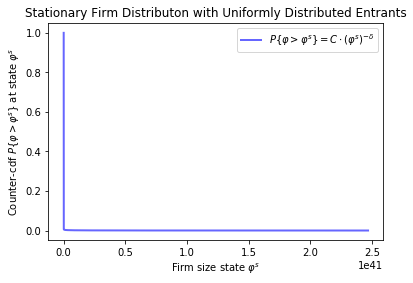

In [8]:
# calculate pdf

Q1 = Q(G1, S, s_star, a, c)
u_init = G1
u1 = solve_model(u_init, Q1)

# calculate counter cdf of firm size distribution
U1 = u1
U1[0] = u1[0]
for i in range(1, S):
    U1[i]= u1[i]+U1[i-1]
    
cU1 = U1
for i in range(S):
    cU1[i]= 1 - U1[i]

# Plot the c-cdf
fig, ax = plt.subplots()
ax.plot(x,cU1, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Uniformly Distributed Entrants')
ax.legend()

plt.show()

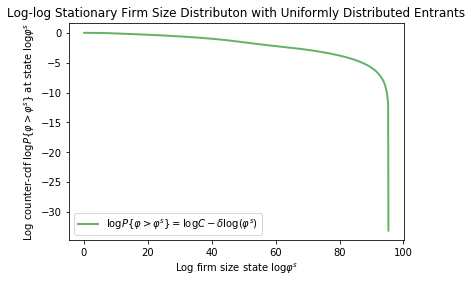

In [9]:
# take the log term of cU
cU_log1 = np.ones(S)
for i in range(S):
    cU_log1[i]= np.log(cU1[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log,cU_log1, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Uniformly Distributed Entrants')
ax.legend()

plt.show()

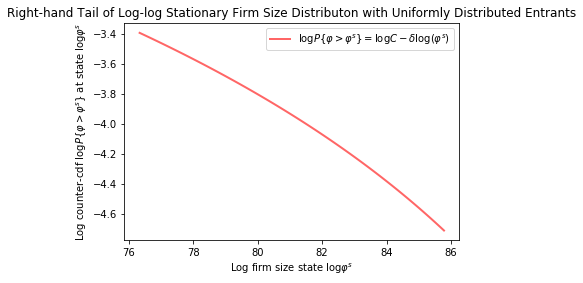

In [10]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log1_z = cU_log1[800:900]
x_log_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log1_z, 'r-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s)$', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Uniformly Distributed Entrants')
ax.legend()

plt.show()

### Simulation 2: when $G$ is Zipf distributed


$$
G(\varphi^s) = \frac{1}{(s)^h}\frac{1}{H_{S, h}} \tag{9}
$$

- where
  - $H_{S, h}=\sum^S_{n=1}(\frac{1}{n^h})$;
  - $h \geq0$

In [11]:
# Generate G, which is a Zipf distribution
def G2(S, p, h):
    H = 0
    for i in range(1, S+1):
        H=H + (1/i)**h
    g = np.ones(S)
    for i in range(S):
        g[i]= i+1
    G = np.ones(S)
    for i in range(S):
        G[i]= (1/((g[i])**h))*(1/H)
    return G

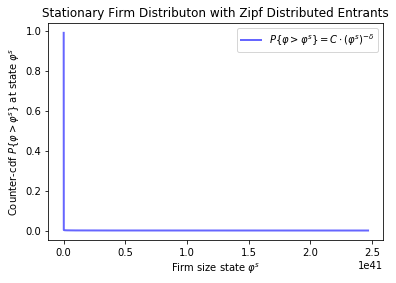

In [12]:
# calculate pdf
G2 = G2(S, p, h)
Q2 = Q(G2, S, s_star, a, c)

u_init = G2
u2 = solve_model(u_init, Q2)

# calculate counter cdf of firm size distribution
U2 = u2
for i in range(1, S):
    U2[i]= u2[i]+U2[i-1]
    
cU2 = U2
for i in range(S):
    cU2[i]= 1 - U2[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x, cU2, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

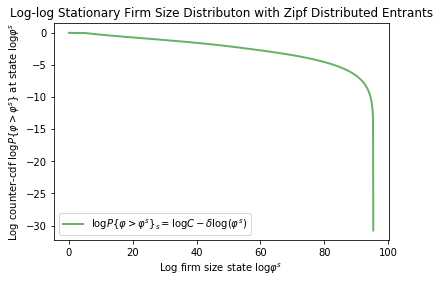

In [13]:
# take the log term of cU
cU_log2 = np.ones(S)
for i in range(S):
    cU_log2[i]= np.log(cU2[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log,cU_log2, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}_s=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

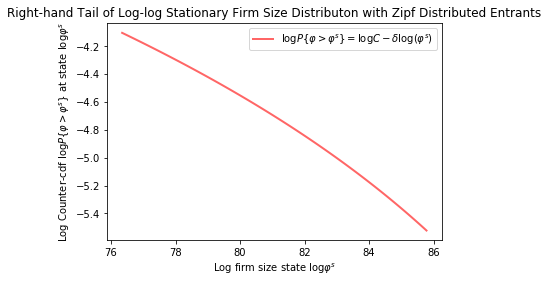

In [14]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log2_z = cU_log2[800:900]
x_log_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log2_z, 'r-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s)$', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

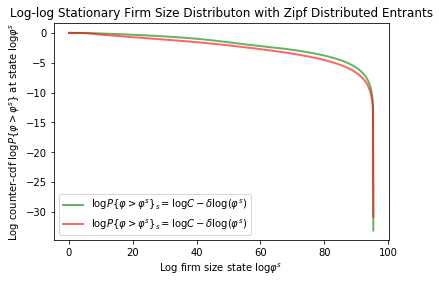

In [15]:
# put graphs in s1 & s2 together

fig, ax = plt.subplots()
ax.plot(x_log,cU_log1, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}_s=\log C -δ \log (φ^s) $', alpha=0.6)
ax.plot(x_log,cU_log2, 'r-', linewidth=2, label='$\log P\{ φ >φ^s \}_s=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

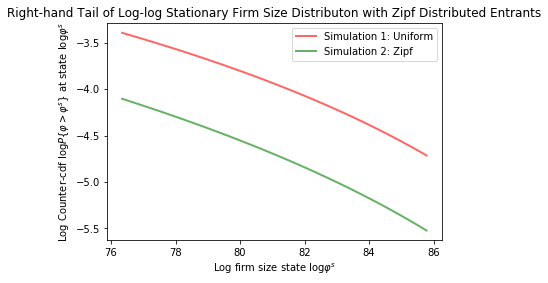

In [16]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf of the s1 & s2
cU_log2_z = cU_log2[800:900]
cU_log1_z = cU_log1[800:900]
x_log_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log1_z, 'r-', linewidth=2, label='Simulation 1: Uniform', alpha=0.6)
ax.plot(x_log_z,cU_log2_z, 'g-', linewidth=2, label='Simulation 2: Zipf', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

### Simulation 3: when $G$ is Logarithmic (series) distributed

$$
G(\varphi^s) = -\frac{p^{s}}{s \log (1-p)}, \forall s \in \{1, 2,\cdots , S\} \tag{10}
$$

- where 
  - $0 < p < 1$: probability of success in each trial;

In [17]:
# Generate G, which is a Logarithmic (series) distribution
def G3(S):
    p = 0.99 #
    G = np.ones(S)
    for i in range(S):
        G[i] = - (p**(i+1))/((i+1) * np.log(1-p))
    return G

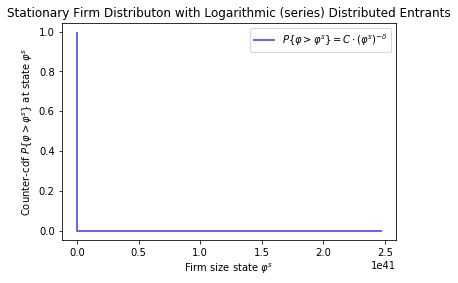

In [18]:
# calculate pdf
G3 = G3(S)
Q3 = Q(G3, S, s_star, a, c)
u_init = G3
u3 = solve_model(u_init, Q3)

# calculate counter cdf of firm size distribution
U3 = u3
U3[0] = u3[0]
for i in range(1, S):
    U3[i]= u3[i]+U3[i-1]
    
cU3 = U3
for i in range(S):
    cU3[i]= 1 - U3[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x, cU3, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Logarithmic (series) Distributed Entrants')
ax.legend()

plt.show()

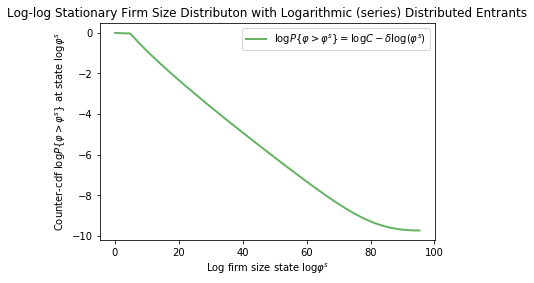

In [19]:
# take the log term of cU
cU_log3 = np.ones(S)
for i in range(S):
    cU_log3[i]= np.log(cU3[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log,cU_log3, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Logarithmic (series) Distributed Entrants')
ax.legend()

plt.show()

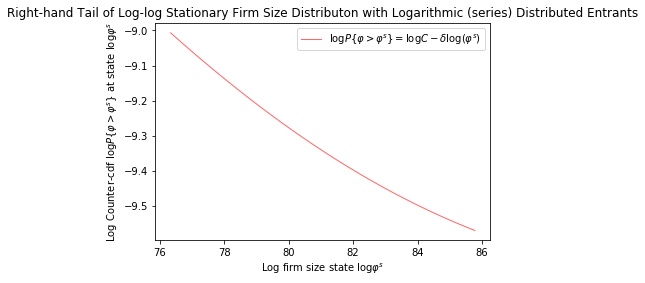

In [20]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log3_z = cU_log3[800:900]
x_log_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log3_z, 'r-', linewidth=1, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s)$', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Logarithmic (series) Distributed Entrants')
ax.legend()

plt.show()

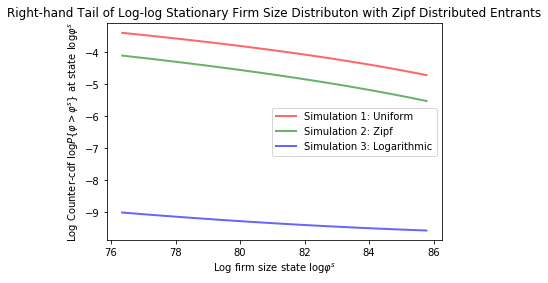

In [21]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf of the s1 & s2 & s3
cU_log3_z = cU_log3[800:900]
cU_log2_z = cU_log2[800:900]
cU_log1_z = cU_log1[800:900]
x_log_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log1_z, 'r-', linewidth=2, label='Simulation 1: Uniform', alpha=0.6)
ax.plot(x_log_z,cU_log2_z, 'g-', linewidth=2, label='Simulation 2: Zipf', alpha=0.6)
ax.plot(x_log_z,cU_log3_z, 'b-', linewidth=2, label='Simulation 3: Logarithmic', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

### Simulation 4: when $G$ is Binomial distributed (* A little problem; To be fixed)

$$
G(\varphi^s)=\begin{pmatrix} S-1 \\ s \end{pmatrix} p^{s} (1-p)^{S-1-s} \\\frac{\Gamma(S)}{\Gamma(s+1) \Gamma(S-s)}p^{s} (1-p)^{S-1-s}, \\ \forall s \in \{0, 1,2,\cdots, S-1 \} \tag{11}
$$

- where
  - $0<p < 1$.
  - $\begin{pmatrix} n \\ k \end{pmatrix}=\frac{\Gamma(n+1)}{\Gamma(k+1) \Gamma(n-k+1)}$.

In [22]:
# Generate G, which is a Binomial distribution
def G4(S, p):
    p=0.80
    G = np.zeros(S)
    for i in range(S):
        G[i]= (gamma(S)/(gamma(i+1)*gamma(S - i)))* (p**i)*((1-p)**(S-1-i))
    return G

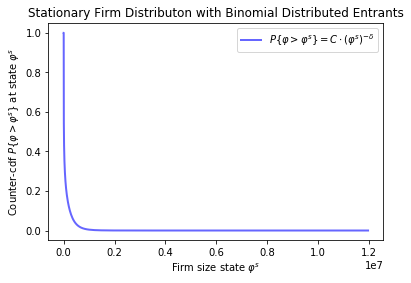

In [23]:
# calculate pdf
G4 = G4(S1, p)
Q4 = Q(G4, S1, s_star, a, c)
u_init = G4
u4 = solve_model(u_init, Q4)

x1 = np.ones(S1)
for i in range(S1):
    x1[i] = φ**(i+1)
    
# calculate counter cdf of firm size distribution
U4 = u4
U4[0] = u4[0]
for i in range(1, S1):
    U4[i]= u4[i]+U4[i-1]
    
cU4 = U4
for i in range(S1):
    cU4[i]= 1 - U4[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x1, cU4, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Binomial Distributed Entrants')
ax.legend()

plt.show()

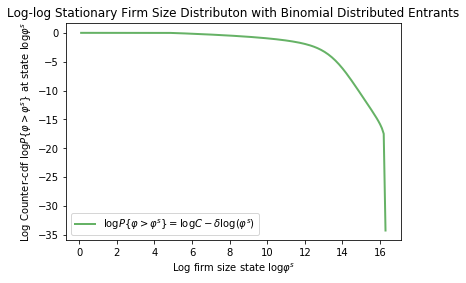

In [24]:
# take the log term of cU
cU_log4 = np.ones(S1)
for i in range(S1):
    cU_log4[i]= np.log(cU4[i])
    
x_log1 = np.ones(S1)
for i in range(S1):
    x_log1[i]= np.log(x1[i])

# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log1,cU_log4, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Binomial Distributed Entrants')
ax.legend()

plt.show()

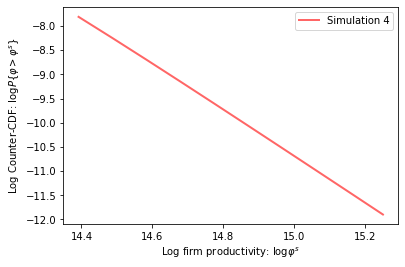

In [57]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log4_z = cU_log4[150:160]
x_log1_z = x_log1[150:160]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log1_z,cU_log4_z, 'r-', linewidth=2, label='Simulation 4', alpha=0.6)

ax.set(xlabel='Log firm productivity: $\log φ^s$', ylabel='Log Counter-CDF: $\log P \{φ > φ^s\}$')
ax.legend()

plt.show()

### Simulation 5: when $G$ is Poisson distributed

$$
G(\varphi^s)= e^{-\lambda} \frac{\lambda^{s-1}}{(s-1)!}, \forall s \in \{1,2,\cdots , S\} \tag{12}
$$

- where
  - $0 < p < 1$: probability of success in each trial;
  - $Sp = \lambda \geq 0$.

In [26]:
# Generate G, which is a Poisson distribution
def G5(S, p):
    λ= S*p
    G = np.ones(S)
    for i in range(S):
        G[i]= np.exp(-λ)*((λ**(i))/gamma(i+1))
    return G

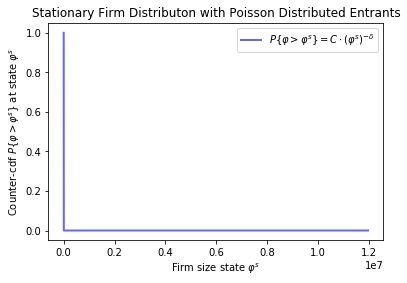

In [27]:
# calculate pdf
G5 = G5(S2, p)
Q5 = Q(G5, S2, s_star, a, c)

u_init = G5
u5 = solve_model(u_init, Q5)

x2 = np.ones(S2)
for i in range(S2):
    x2[i]= φ**(i+1)
    
# calculate counter cdf of firm size distribution
U5 = u5
U5[0] = u5[0]
for i in range(1, S2):
    U5[i]= u5[i]+U5[i-1]
    
cU5 = U5
for i in range(S2):
    cU5[i]= 1 - U5[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x2, cU5, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Poisson Distributed Entrants')
ax.legend()

plt.show()

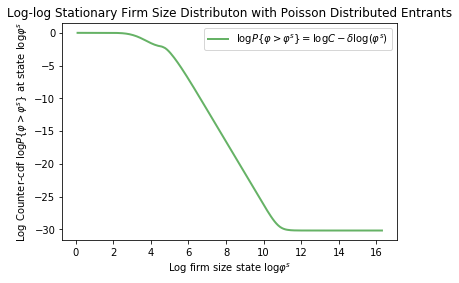

In [28]:
# take the log term of cU
cU_log5 = np.ones(S2)
for i in range(S2):
    cU_log5[i]= np.log(cU5[i])
    
x_log2 = np.ones(S2)
for i in range(S2):
    x_log2[i]= np.log(x2[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log2,cU_log5, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Poisson Distributed Entrants')
ax.legend()

plt.show()

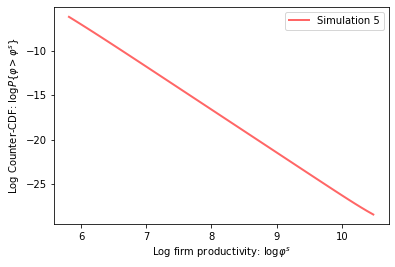

In [59]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log5_z = cU_log5[60:110]
x_log2_z = x_log2[60:110]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log2_z,cU_log5_z, 'r-', linewidth=2, label='Simulation 5', alpha=0.6)

ax.set(xlabel='Log firm productivity: $\log φ^s$', ylabel='Log Counter-CDF: $\log P \{φ > φ^s\}$')
ax.legend()

plt.show()

### Simulation 6: when $G$ is Geometric distributed (*** Problematic: because of infinite support?; To be fixed)

$$
G(\varphi^s)= (1-p)^{s-1} p, \forall s \in\{1,...,S\} \tag{13}
$$

- where 
  - $0 < p < 1$: probability of success in each trial;

In [30]:
# Generate G, which is a Geometric distribution
def G6(S, p):
    p=0.01
    G = np.zeros(S)
    for i in range(S):
        G[i]= ((1-p)**(i))*p
    return G

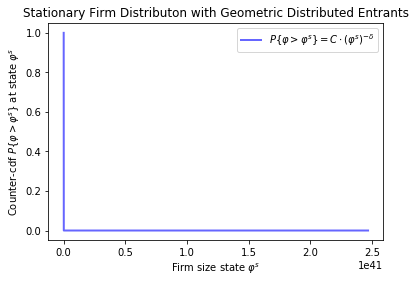

In [31]:
# calculate pdf
G6 = G6(S, p)
Q6 = Q(G6, S, s_star, a, c)

u_init = G6
u6 = solve_model(u_init, Q6)

# calculate counter cdf of firm size distribution
U6 = u6
U6[0] = u6[0]
for i in range(1, S):
    U6[i]= u6[i]+U6[i-1]
    
cU6 = U6
for i in range(S):
    cU6[i]= 1 - U6[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x, cU6, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Geometric Distributed Entrants')
ax.legend()

plt.show()

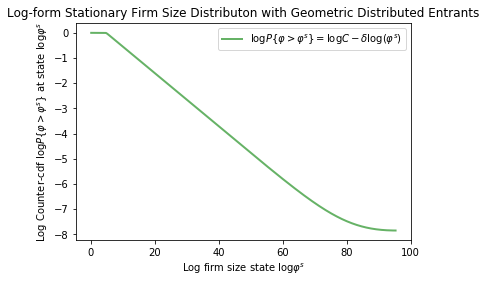

In [32]:
# take the log term of cU
cU_log6 = np.ones(S)
for i in range(S):
    cU_log6[i]= np.log(cU6[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log,cU_log6, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-form Stationary Firm Size Distributon with Geometric Distributed Entrants')
ax.legend()

plt.show()

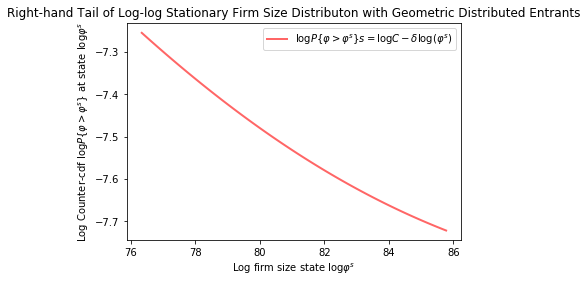

In [33]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log6_z = cU_log6[800:900]
x_log3_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log3_z,cU_log6_z, 'r-', linewidth=2, label='$\log P\{ φ >φ^s \}s=\log C -δ \log (φ^s)$', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Geometric Distributed Entrants')
ax.legend()

plt.show()

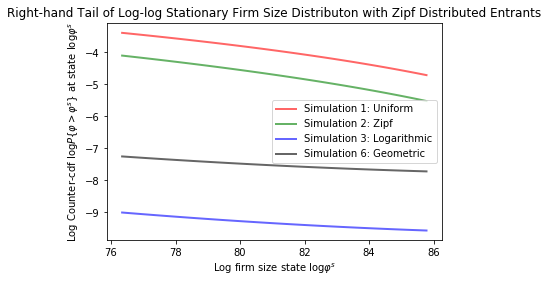

In [34]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf of the s1 & s2 & s3 & s6 
cU_log6_z = cU_log6[800:900]
cU_log3_z = cU_log3[800:900]
cU_log2_z = cU_log2[800:900]
cU_log1_z = cU_log1[800:900]
x_log_z = x_log[800:900]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log1_z, 'red', linewidth=2, label='Simulation 1: Uniform', alpha=0.6)
ax.plot(x_log_z,cU_log2_z, 'green', linewidth=2, label='Simulation 2: Zipf', alpha=0.6)
ax.plot(x_log_z,cU_log3_z, 'blue', linewidth=2, label='Simulation 3: Logarithmic', alpha=0.6)
ax.plot(x_log_z,cU_log6_z, 'black', linewidth=2, label='Simulation 6: Geometric', alpha=0.6)


ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Zipf Distributed Entrants')
ax.legend()

plt.show()

### Simulation 7: when $G$ is Negative Binomial distributed (* Problematic: a problem occuring in this problem; To be fixed)

$$
G(\varphi^s)=\begin{pmatrix} s +S-1 \\ s \end{pmatrix} p^{S} (1-p)^{s} \\=\frac{\Gamma(s+S)}{\Gamma(S)\Gamma{(s+1)}}p^{S} (1-p)^{s}, \\ \forall s \in \{0, 1, 2, \cdots, S-1 \} \tag{14}
$$

- where
  - $0 < p < 1$: probability of success in each trial.

In [35]:
# Generate G, which is a Negative Binomial distribution
def G7(S, p):
    p=0.5
    G = np.zeros(S)
    for i in range(S):
        G[i]= (gamma(i + S)/(gamma(S)*gamma(i+1)))*(p**S)*((1-p)**(i))
    return G

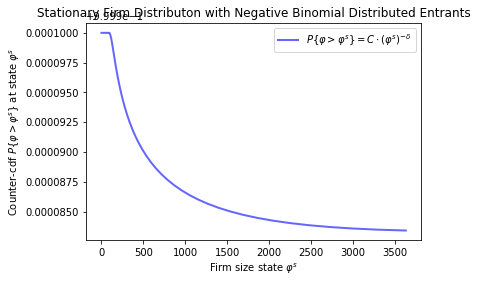

In [36]:
# calculate pdf
G7 = G7(S3, p)
Q7 = Q(G7, S3, s_star, a, c)

u_init = G7
u7 = solve_model(u_init, Q7)

x4 = np.ones(S3)
for i in range(S3):
    x4[i]= φ**(i+1)
    
# calculate counter cdf of firm size distribution
U7 = u7
U7[0] = u7[0]
for i in range(1, S3):
    U7[i]= u7[i]+U7[i-1]
    
cU7 = U7
for i in range(S3):
    cU7[i]= 1 - U7[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x4, cU7, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Negative Binomial Distributed Entrants')
ax.legend()

plt.show()

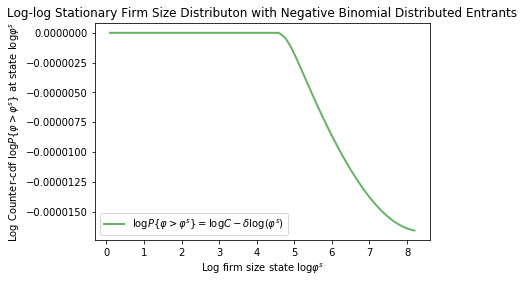

In [37]:
# take the log term of cU
cU_log7 = np.ones(S3)
for i in range(S3):
    cU_log7[i]= np.log(cU7[i])
    
x_log4 = np.ones(S3)
for i in range(S3):
    x_log4[i]= np.log(x4[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log4,cU_log7, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Negative Binomial Distributed Entrants')
ax.legend()

plt.show()

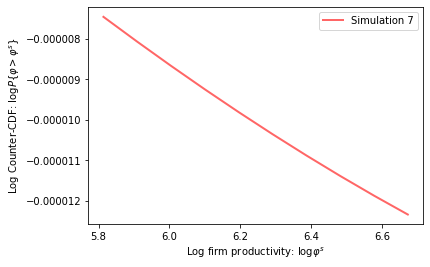

In [62]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log7_z = cU_log7[60:70]
x_log4_z = x_log4[60:70]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log4_z,cU_log7_z, 'r-', linewidth=2, label='Simulation 7', alpha=0.6)

ax.set(xlabel='Log firm productivity: $\log φ^s$', ylabel='Log Counter-CDF: $\log P \{φ > φ^s\}$')
ax.legend()

plt.show()

### Simulation 8: when $G$ is Beta-Binomial distributed (**A problem to be fixed up**)


$$
G(\varphi^s)= \begin{pmatrix} S-1 \\ s \end{pmatrix} \frac{B(s + \alpha, S-1 - s+ \beta)}{B(\alpha, \beta)} \\= \frac{\Gamma(S)}{\Gamma(s+1) \Gamma(S-s )} \frac{\Gamma(s+\alpha)\Gamma(S-1+s +\beta)}{\Gamma(S-1+\alpha+\beta)}\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}, \\ \forall s \in \{0, 1,2,\cdots, S-1 \} \tag{15}
$$

- where
  - $B(\alpha, \beta)= \frac{\Gamma (\alpha) \Gamma(\beta)}{\Gamma (\alpha+\beta)}$,
    - $\Gamma$: the Gamma Function,
      - $\Gamma(n)= (n-1)!$,
      - $\Gamma(n)= \int^{\infty}_{0} x^{n-1} e^{-x}dx$,
    - $\alpha > 0$,
    - $\beta>0$,

In [39]:
# Generate G, which is a Beta Binomial distribution
def G8(S):
    α, β = 0.7, 0.2
    s = np.arange(S)
    G = binom(S-1, s) * beta(s + α, S -1 - s + β )/ beta(α, β)
    return G

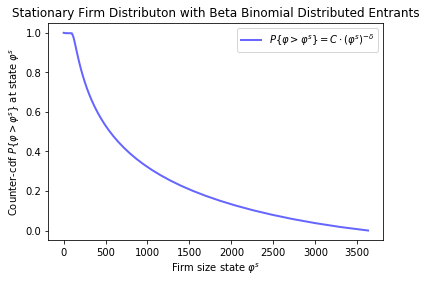

In [40]:
# calculate pdf
G8 = G8(S3)
Q8 = Q(G8, S3, s_star, a, c)

u_init = G8
u8 = solve_model(u_init, Q8)

x5 = np.ones(S3)
for i in range(S3):
    x5[i]= φ**(i+1)
    
# calculate counter cdf of firm size distribution
U8 = u8
U8[0] = u8[0]
for i in range(1, S3):
    U8[i]= u8[i]+U8[i-1]
    
cU8 = U8
for i in range(S3):
    cU8[i]= 1 - U8[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x5, cU8, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Beta Binomial Distributed Entrants')
ax.legend()

plt.show()

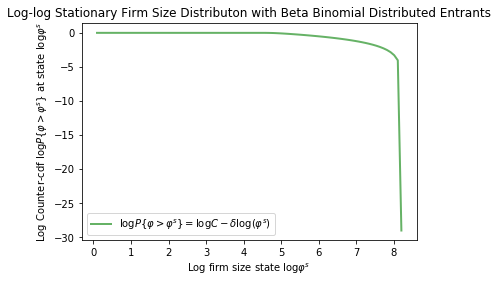

In [41]:
# take the log term of cU
cU_log8 = np.ones(S3)
for i in range(S3):
    cU_log8[i]= np.log(cU8[i])

x_log5 = np.ones(S3)
for i in range(S3):
    x_log5[i]= np.log(x5[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log5,cU_log8, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Beta Binomial Distributed Entrants')
ax.legend()

plt.show()

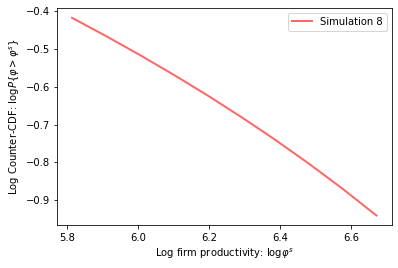

In [66]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log8_z = cU_log8[60:70]
x_log5_z = x_log5[60:70]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log5_z,cU_log8_z, 'r-', linewidth=2, label='Simulation 8', alpha=0.6)

ax.set(xlabel='Log firm productivity: $\log φ^s$', ylabel='Log Counter-CDF: $\log P \{φ > φ^s\}$')
ax.legend()

plt.show()

### Simulation 9: when $G$ is Benford distributed

$$
G(\varphi^s)= \log_{S+1} (1+ \frac{1}{s}), \forall s \in \{1, \cdots, S\} \tag{16}
$$


In [43]:
# Generate G, which is a Benford distribution
def G9(S):
    G = np.zeros(S)
    for i in range(S):
        G[i] = (np.log(1+ (1/(i+1))))/(np.log(S+1))
    return G

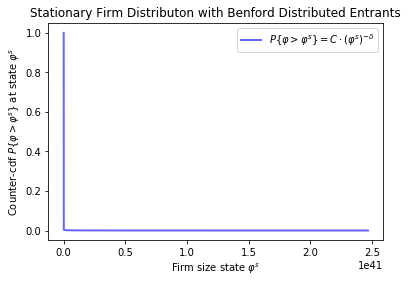

In [44]:
# calculate pdf
G9 = G9(S)
Q9 = Q(G9, S, s_star, a, c)

u_init = G9
u9 = solve_model(u_init, Q9)

# calculate counter cdf of firm size distribution
U9 = u9
U9[0] = u9[0]
for i in range(1, S):
    U9[i]= u9[i]+U9[i-1]
    
cU9 = U9
for i in range(S):
    cU9[i]= 1 - U9[i]
    
# Plot the counter cdf of firm size distribution
fig, ax = plt.subplots()
ax.plot(x, cU9, 'b-', linewidth=2, label='$P\{ φ >φ^s \}=C \cdot (φ^s)^{-δ}$', alpha=0.6)

ax.set(xlabel='Firm size state $φ^s$', ylabel='Counter-cdf $P\{ φ >φ^s \}$ at state $φ^s$')
ax.set_title('Stationary Firm Distributon with Benford Distributed Entrants')
ax.legend()

plt.show()

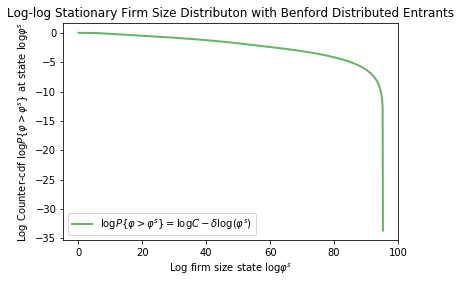

In [45]:
# take the log term of cU
cU_log9 = np.ones(S)
for i in range(S):
    cU_log9[i]= np.log(cU9[i])
    
# Plot the log-log ccdf distribution
fig, ax = plt.subplots()
ax.plot(x_log,cU_log9, 'g-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s) $', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Log-log Stationary Firm Size Distributon with Benford Distributed Entrants')
ax.legend()

plt.show()

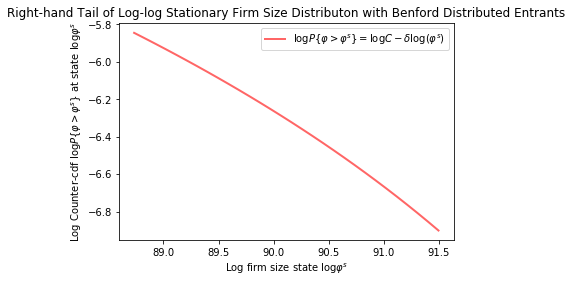

In [46]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf
cU_log9_z = cU_log9[930:960]
x_log6_z = x_log[930:960]

# Plot the Right-hand tail of the log distribution
fig, ax = plt.subplots()
ax.plot(x_log6_z,cU_log9_z, 'r-', linewidth=2, label='$\log P\{ φ >φ^s \}=\log C -δ \log (φ^s)$', alpha=0.6)

ax.set(xlabel='Log firm size state $\log φ^s$', ylabel='Log Counter-cdf $\log P\{ φ >φ^s \}$ at state $\log φ^s$')
ax.set_title('Right-hand Tail of Log-log Stationary Firm Size Distributon with Benford Distributed Entrants')
ax.legend()

plt.show()

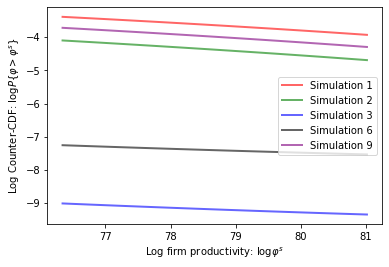

In [56]:
# Consider Right-hand-tail of Stationary Firm Size Distributon's log-log cdf of the s1 & s2 & s3 & s6 & s9
cU_log9_z = cU_log9[800:850]
cU_log6_z = cU_log6[800:850]
cU_log3_z = cU_log3[800:850]
cU_log2_z = cU_log2[800:850]
cU_log1_z = cU_log1[800:850]
x_log_z = x_log[800:850]

# Plot the Right-hand tails of the log distributions
fig, ax = plt.subplots()
ax.plot(x_log_z,cU_log1_z, 'red', linewidth=2, label='Simulation 1', alpha=0.6)
ax.plot(x_log_z,cU_log2_z, 'green', linewidth=2, label='Simulation 2', alpha=0.6)
ax.plot(x_log_z,cU_log3_z, 'blue', linewidth=2, label='Simulation 3', alpha=0.6)
ax.plot(x_log_z,cU_log6_z, 'black', linewidth=2, label='Simulation 6', alpha=0.6)
ax.plot(x_log_z,cU_log9_z, 'purple', linewidth=2, label='Simulation 9', alpha=0.6)



ax.set(xlabel='Log firm productivity: $\log φ^s$', ylabel='Log Counter-CDF: $\log P \{φ > φ^s\}$')
ax.legend()

plt.show()